# Exploratory Data Analysis
## Lecture 8, EM212: Applied Data Science

# This lecture will include:

1. A revisit to git
2. A revisit to our dataet from lecture 
3. A more in-depth discussion of exploratory data analysis

# To obtain these slides

`cd your_path/applied_ds`


`git fetch upstream`


`git merge upstream/master`

# To run this notebook

`source activate em212`

`jupyter notebook`

# We will be revisiting

### Diamonds Dataset (Wickham, 2009)


A data frame with 53940 rows and 10 variables:

 price: price in US dollars (326--18,823)

 carat: weight of the diamond (0.2--5.01)

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: diamond colour, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0--10.74)

y: width in mm (0--58.9)

z: depth in mm (0--31.8)

depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table: width of top of diamond relative to widest point (43--95)

We'll also be using the same tools

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import statsmodels.formula.api as smf
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
sns.set_context('talk')
sns.set_style('darkgrid')
sns.set_palette('colorblind')

In [34]:
import eda_hw
import importlib

In [38]:
importlib.reload(eda_hw)

<module 'eda_hw' from '/Users/forde/Documents/tufts_class/eda_hw.py'>

In [39]:
eda_hw.average([1,2,3])

# Tabular Data in Pandas

Tabular Data of rows and columns in pandas is called a DataFrame

Pandas calls rows "indices"

The dataframe is an object, which means it can call functions on itself.
These functions are known as methods and are noted with the `oject_name.method_name()` notation

`.head()` is a method that copies the first 5 rows out of the dataframe

In [5]:
diamonds = sns.load_dataset("diamonds")

carat       0.797940
depth      61.749405
table      57.457184
price    3932.799722
x           5.731157
y           5.734526
z           3.538734
dtype: float64

# Exploratory Data Analysis

Allows us to both visualize and begin to understand our data.

We can create basic measurements to understand what has been recorded

# Counting Values

For tabluar data, counting values can be useful.  The `.value_counts()` method will group partiuclar values and count them for us.  

Single columns or rows of data in pandas are called Series.  We can index a particular column from the series by calling its name in brackets and quotes or calling it with as an attribute by writing `.column_name`

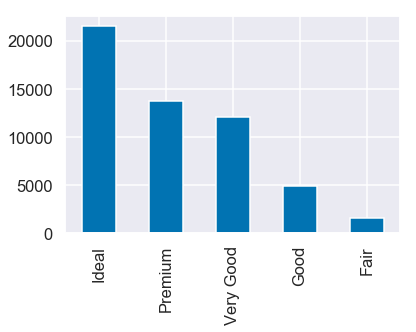

In [14]:
diamonds['cut'].value_counts().plot(kind='bar')

# To visualize these counts, we can make a bar plot

Pandas allows us to join methods together

Text(0, 0.5, 'Diamonds')

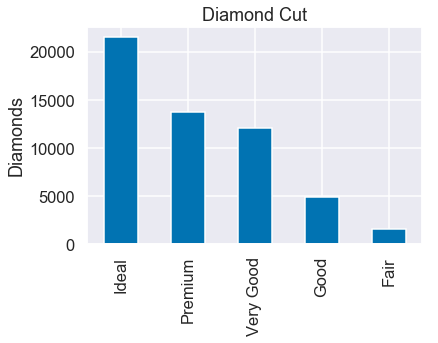

In [18]:
diamonds['cut'].value_counts().plot(kind='bar')
plt.title('Diamond Cut')
plt.ylabel('Diamonds')

# Averages and Standard Deviation

Recall that the average of our data is

$$\bar{x} = \frac{\Sigma_{i=0}^n x_i}{n}$$

And our standard deviation is 

$$s = \sqrt{\frac{\Sigma_{i=0}^n (x_i - \mu)^2}{n-1}}$$

In [21]:
diamonds['price'].sum()/len(diamonds.price) == diamonds.price.mean()

True

In [20]:
diamonds.price.std()

3989.439738146379

# Percentiles

The $i$th percentile of a series of numbers $x$ is the number in that series that is larger than $i$% of the numbers in the series

The 50th percentile is called the median

In [19]:
diamonds.price.median()

2401.0

In [29]:
np.percentile(diamonds.price, 10)

646.0

`.describe()` provides many of these statistics in a single place

In [30]:
# basic statistics in pandas

pd.DataFrame(diamonds.price.describe())

,price
count,53940.000000
mean,3932.799722
std,3989.439738
min,326.000000
25%,950.000000
50%,2401.000000
75%,5324.250000
max,18823.000000


# Pivot Tables

Pivot table caluclate a basic statistic like counts, means, or percentiles across multiple characteristics, such as 

The average price for a specific cut and color

In [59]:
diamonds.groupby(['cut', 'color'])['price'].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Ideal      D        2629.094566
           E        2597.550090
           F        3374.939362
           G        3720.706388
           H        3889.334831
           I        4451.970377
           J        4918.186384
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Very Good  D        3470.467284
           E        3214.652083
           F        377

These visualizations are improved with a heatmap

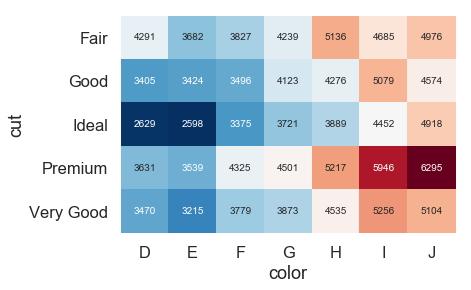

In [23]:
sns.heatmap(diamonds.groupby(['cut', 'color'])['price'].mean().unstack(),
annot=True, cbar=False, fmt='.0f', cmap='RdBu_r')

# Histograms

`np.arange` makes a linearly spaced array of numbers between the lowest and the highest with whatever spacing provided to cutomize the bins

Text(0, 0.5, 'number of diamonds')

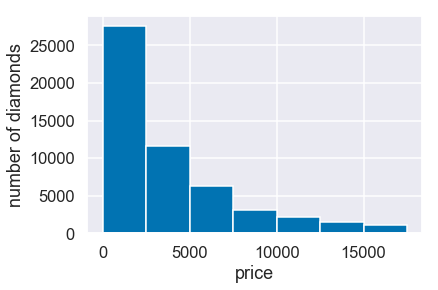

In [26]:
# a simple histogram in pandas

diamonds['price'].hist(bins=np.arange(0,20000,2500))
plt.xlabel('price')
plt.ylabel('number of diamonds')

# Categorical variables

Most categorical variable can be created by declaring the variable as `.astype('category')`

by delcaring `ordered=True` we can include a specific ordering

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: diamond colour, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

In [3]:
cut_ranking = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
print(cut_ranking)
clarity_ranking = 'I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF'.replace(' ', '').split(',')
print(clarity_ranking)
color_ranking = diamonds.loc[:,'color'].drop_duplicates().sort_values(ascending=False).values
print(color_ranking)

['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
['J' 'I' 'H' 'G' 'F' 'E' 'D']


In [4]:
columns_n_orders = {'cut': cut_ranking, 'clarity': clarity_ranking, 'color': color_ranking}

for column, ordering in columns_n_orders.items():
    diamonds.loc[:,column] = diamonds.loc[:,column]\
    .astype('category', ordered=True, categories=ordering)

We just made a [dictionary](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) to keep the column name and order we want together.  Then we [added the ordering the each column in pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html)

Scatterplots allow us to create simple plots of multiple variables in our dataset

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


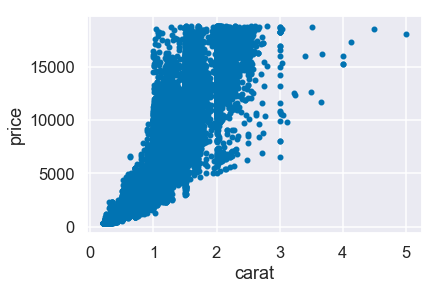

In [7]:
# a simple scatterplot 

diamonds.plot.scatter('carat', 'price')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


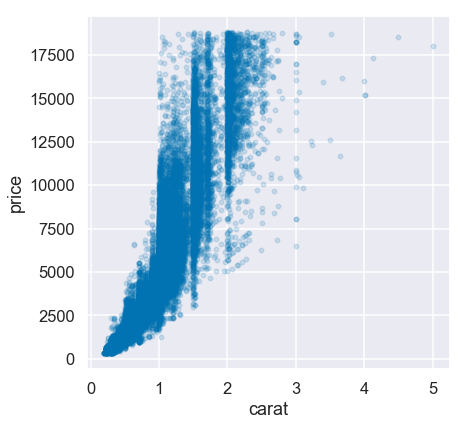

In [8]:
# a more easy to read scatterplot 
f, ax = plt.subplots(figsize=(6.5, 6.5))
diamonds.plot.scatter('carat', 'price', alpha=0.15,ax=ax)

# Boxplots

Boxplots are a simple way to display quantiles in our data. 

The box shows the 25th, 50th and 75th percentile

The bars at the top and bottom of the boxes are 1.5 times the difference between the 75th and 25th percentile

Little dots are outliers

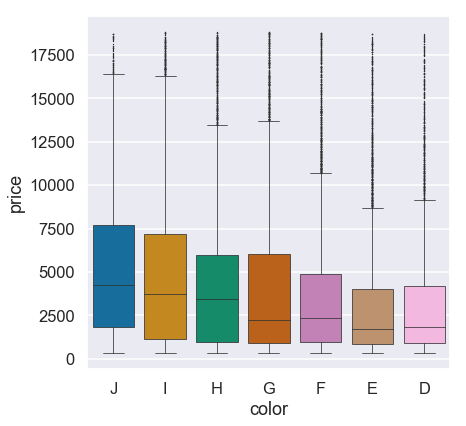

In [9]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.boxplot(x="color", y="price", data=diamonds, fliersize=0.5, linewidth=0.75, ax=ax)

# Appending Data

Here is some data from [Chu, 2001](http://jse.amstat.org/v9n2/datasets.chu.html)

carat: weight of diamond stones in carat units

color: Colour - D, E, F, G, H or I

clarity: IF, VVS1, VVS2, VS1 or VS2

Certification Body: GIA, IGI or HRD

price: Price (Singapore $)

In [27]:
straits_data = pd.read_csv('http://jse.amstat.org/v9n2/4Cdata.txt', sep = '\s+', names=['carat', 'color', 'clarity', 'certification', 'price_sg'])
straits_data.head()

,carat,color,clarity,certification,price_sg
0,0.30,D,VS2,GIA,1302
1,0.30,E,VS1,GIA,1510
2,0.30,G,VVS1,GIA,1510
3,0.30,G,VS1,GIA,1260
4,0.31,D,VS1,GIA,1641


In [33]:
len(straits_data)

308

In [28]:
straits_data['price'] = 0.74 * straits_data.price_sg

In [35]:
diamonds.append(straits_data, ignore_index=True).tail(310)

,carat,certification,clarity,color,cut,depth,price,price_sg,table,x,y,z
53938,0.86,NaN,SI2,H,Premium,61.0,2757.00,NaN,58.0,6.15,6.12,3.74
53939,0.75,NaN,SI2,D,Ideal,62.2,2757.00,NaN,55.0,5.83,5.87,3.64
53940,0.30,GIA,VS2,D,NaN,NaN,963.48,1302.0,NaN,NaN,NaN,NaN
53941,0.30,GIA,VS1,E,NaN,NaN,1117.40,1510.0,NaN,NaN,NaN,NaN
53942,0.30,GIA,VVS1,G,NaN,NaN,1117.40,1510.0,NaN,NaN,NaN,NaN
53943,0.30,GIA,VS1,G,NaN,NaN,932.40,1260.0,NaN,NaN,NaN,NaN
53944,0.31,GIA,VS1,D,NaN,NaN,1214.34,1641.0,NaN,NaN,NaN,NaN
53945,0.31,GIA,VS1,E,NaN,NaN,1150.70,1555.0,NaN,NaN,NaN,NaN
53946,0.31,GIA,VS1,F,NaN,NaN,1055.98,1427.0,NaN,NaN,NaN,NaN
53947,0.31,GIA,VVS2,G,NaN,NaN,1055.98,1427.0,NaN,NaN,NaN,NaN
